In [3]:
%matplotlib notebook
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import create_engine, MetaData
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy import Table, Column, Integer, String, Numeric, Text, Float
import pandas as pd
from datetime import datetime


from sqlalchemy import Column, String, Integer, DateTime
from sqlalchemy import or_
from sqlalchemy import desc
from sqlalchemy.orm import sessionmaker
from sqlalchemy.exc import SQLAlchemyError
from sqlalchemy.engine.url import URL
from sqlalchemy import (
    create_engine,
    Table,
    MetaData,
    Column,
    Integer,
    String,
    ForeignKey)

from sqlalchemy.orm import (
    mapper,
    relationship,
    sessionmaker)

In [5]:
# We can view all of the classes that automap found
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

for table_name in engine.table_names():
    print(table_name)
    Base.classes.keys()

measurement
station


In [7]:

engine.execute('SELECT * FROM measurement LIMIT 5').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0)]

In [8]:
engine.execute('SELECT * FROM station LIMIT 5').fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6)]

In [9]:


# Reflect Database into ORM class
# Save references to each table
Station = Base.classes.station
Measurement = Base.classes.measurement





In [10]:
# Create our session (link) from Python to the DB, a session to query the database
# create session
Session = sessionmaker(engine)
session = Session()

In [11]:


metadata = MetaData(engine, reflect=True)
#print(metadata.tables)
sta_table = metadata.tables['station']
meas_table = metadata.tables['measurement']
print(sta_table.columns)
print(meas_table)
print(meas_table.columns)

['station.id', 'station.station', 'station.name', 'station.latitude', 'station.longitude', 'station.elevation']
measurement
['measurement.id', 'measurement.station', 'measurement.date', 'measurement.prcp', 'measurement.tobs']


/Users/ghassan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SADeprecationWarning: reflect=True is deprecate; please use the reflect() method.
  This is separate from the ipykernel package so we can avoid doing imports until


In [12]:
Base = declarative_base()

In [13]:

# Measurement Class
# ----------------------------------
class Measurement(Base):
    __tablename__ = 'measurement'
    id = Column(Integer, primary_key=True)
    station = Column(String(15))
    date = Column(String(15))
    prcp = Column(Float)
    tobs = Column(Integer)

    def __repr__(self):
        return f"id={self.id}, name={self.name}"



In [14]:

# Station class
# ---------------------------------------
class Station(Base):
    __tablename__ = 'station'
    id = Column(Integer, primary_key=True)
    station = Column(String(15))
    name = Column(String(45))
    latitude = Column(Float)
    longitude = Column(Float)
    elevation = Column(Float)
    
    def __repr__(self):
        return f"id={self.id}, name={self.name}"




# Exploratory Climate Analysis

-157.8168 21.2716 3.0
-157.8015 21.4234 14.6
-157.8374 21.5213 7.0
-157.9751 21.3934 11.9
-158.0111 21.4992 306.6
-157.71139 21.33556 19.5
-157.84888999999998 21.45167 32.9
-157.9992 21.3152 0.9
-157.8025 21.3331 152.4


/Users/ghassan/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1698: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  limb = ax.axesPatch
/Users/ghassan/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1767: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  axisbgc = ax.get_axis_bgcolor()
/Users/ghassan/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3222: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/ghassan/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3231: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


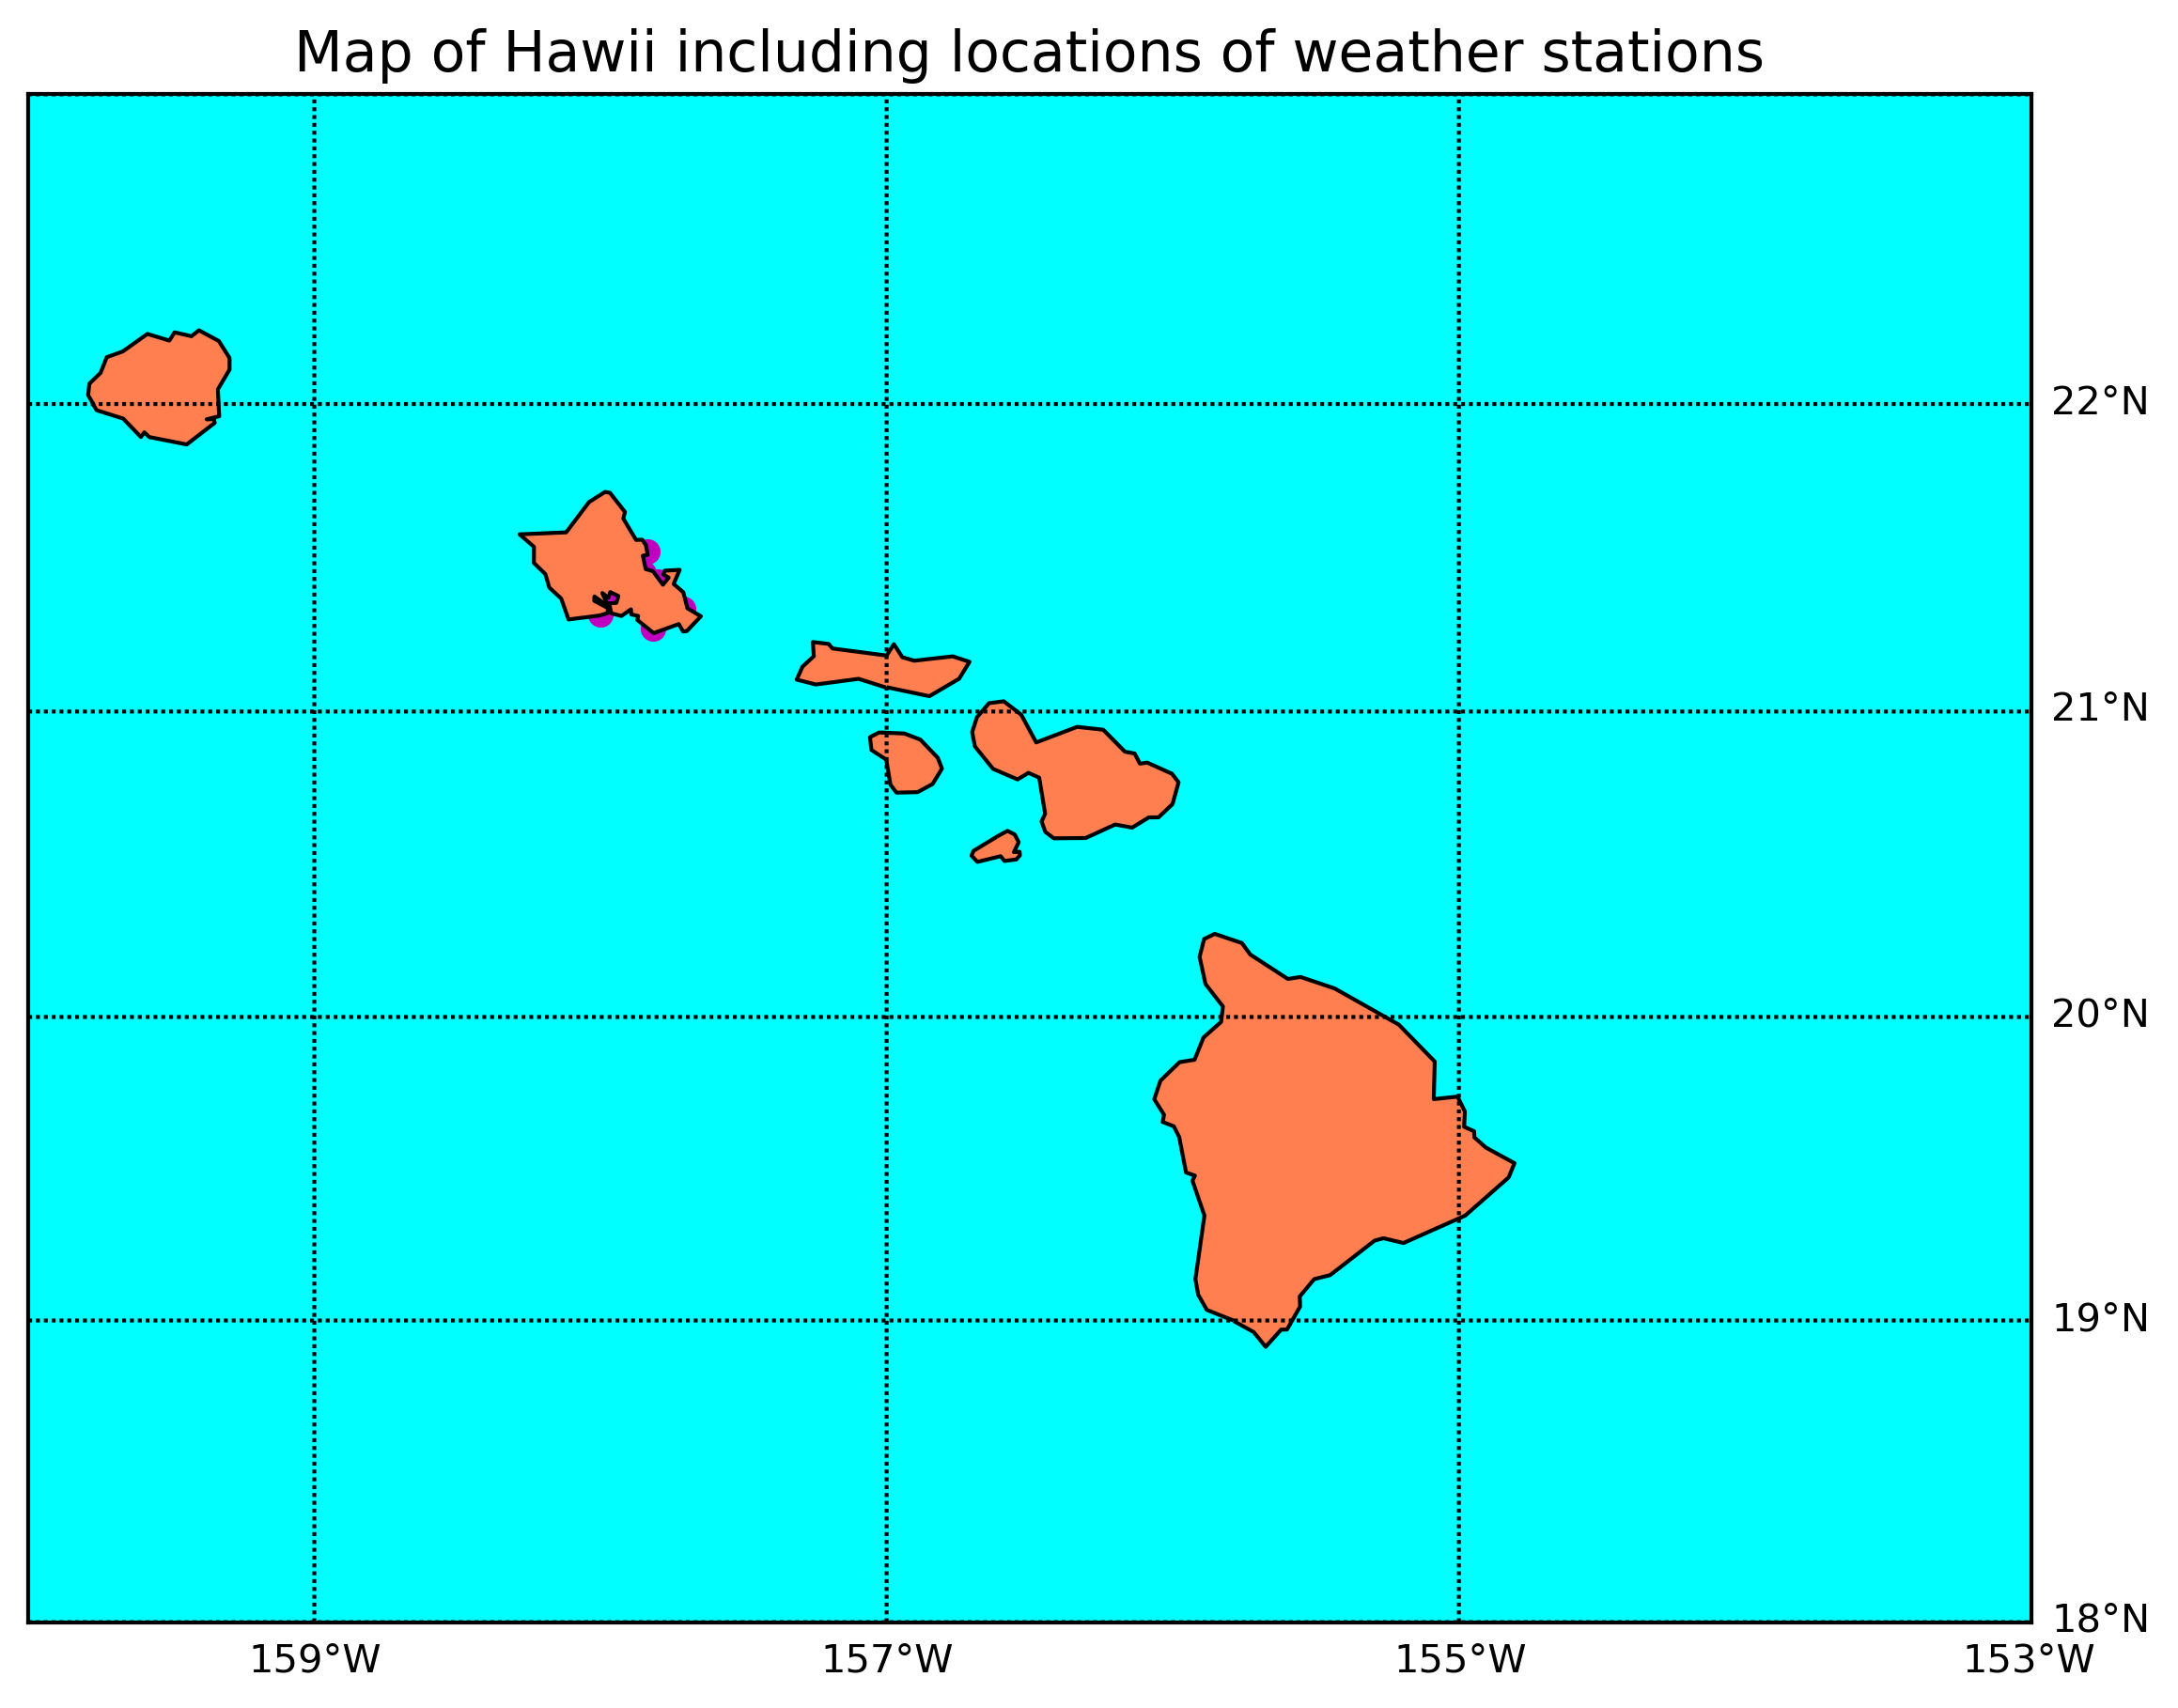

            prcp
date            
2016-08-24  0.08
2016-08-25  0.08
2016-08-26  0.00
2016-08-27  0.00
2016-08-28  0.01


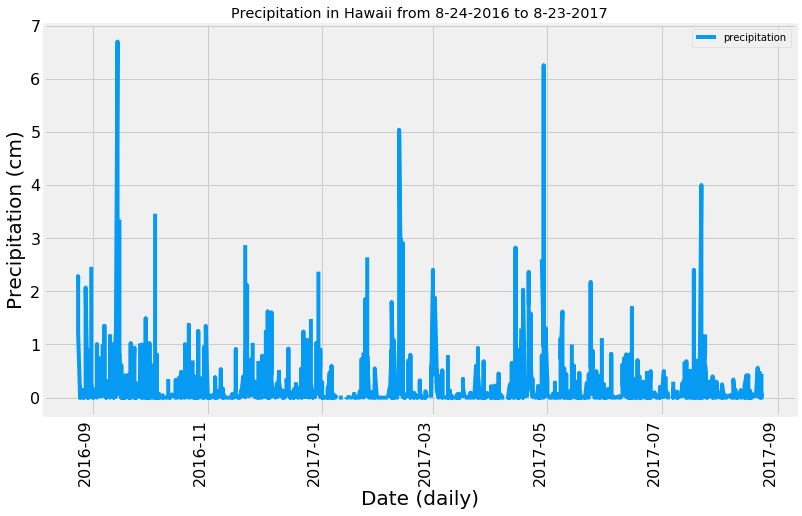

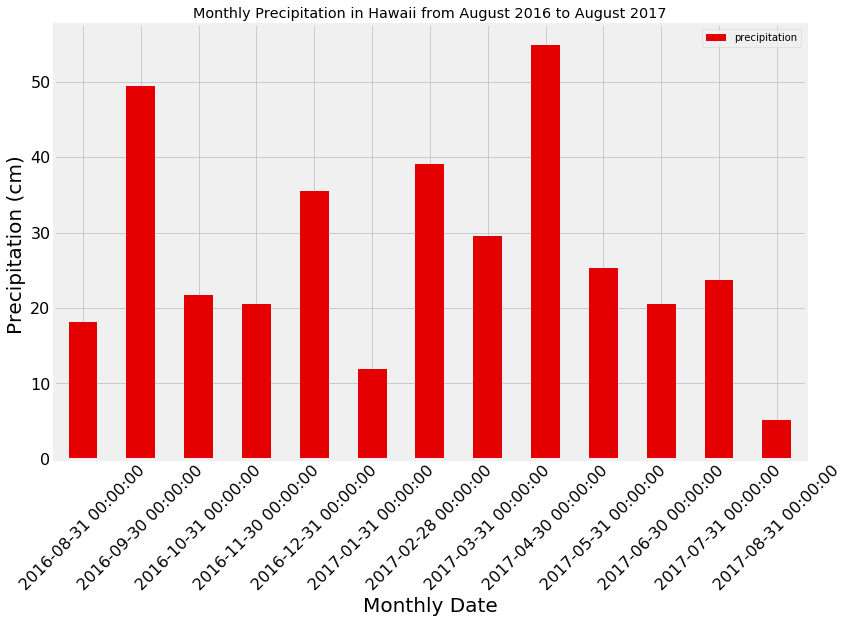

2017-09-07


In [15]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import datetime
import matplotlib.dates as mdates
# Design a query to retrieve the last 12 months of precipitation data and plot the results
longitude=[]
latitude=[]
elevation=[]
lat_lon = session.query(Station).order_by(Station.id).all()
for row in lat_lon:
    latitude.append(row.latitude)
    longitude.append(row.longitude)
    elevation.append(row.elevation)
    print(row.longitude, row.latitude,row.elevation)
    


#map = Basemap(projection='ortho', 
#              lat_0=20, lon_0=-150)


fig = plt.figure(figsize=(7205 / 600, 4308 / 600), dpi=300)
map = Basemap(projection='merc',llcrnrlat=18,urcrnrlat=23,\
            llcrnrlon=-160,urcrnrlon=-153,resolution='i')
map.drawmapboundary(fill_color='aqua')
map.fillcontinents(color='coral',lake_color='aqua')

parallels = np.arange(0.,81,1.)
# labels = [left,right,top,bottom]
map.drawparallels(parallels,labels=[False,True,True,False])
meridians = np.arange(1.,351.,2.)
map.drawmeridians(meridians,labels=[True,False,False,True])
map.drawcoastlines()

x, y = map(longitude, latitude)

map.scatter(x, y, marker='o',color='m')
plt.title("Map of Hawii including locations of weather stations")
plt.savefig('Hawaii.png', dpi=300)
plt.show()
 
    
from sqlalchemy import desc
#measurements = session.query(Measurement).all()
#
                                   # loads query results => dataframe


#measurements = session.query(Measurement).filter(Measurement.date.between('2016-08-23', '2017-08-23'))\
#               .order_by(Measurement.date).all()
    

# queries the database for previous years precipitation data.
measurements  = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= "2016-08-24").\
    filter(Measurement.date <= "2017-08-23").all()
# Perform a query to retrieve the data and precipitation scores

precip_df = pd.DataFrame(measurements)                                    # loads query results => dataframe
#precip_df['month'] = pd.DatetimeIndex(precip_df['date']).month

# converts date to datetime object - Necessary for proper sorting of plot. See improper sort in README.md.
precip_df['date'] = pd.to_datetime(precip_df['date'])

# Save the query results as a Pandas DataFrame and set the index to the date column
precip_df = precip_df.set_index('date') 

print (precip_df.head())
# Sort the dataframe by date
time_format = '%Y-%m-%d'

precip_df.index.names = ['date']

precip_df = precip_df.sort_index()

# reindexes dataframe by date
precip_df.rename(columns = {'prcp': 'precipitation'}, inplace=True)          # renames column for legend

summed_df = precip_df.groupby([pd.Grouper(freq='1M')]).sum()
#print(summed_df.head())

# Use Pandas Plotting with Matplotlib to plot the data
#print(precip_df.head(20))

precip_df.plot(figsize=(12, 8),                                            # plots the data
               sort_columns=True, 
               use_index=True, 
               title='Precipitation in Hawaii from 8-24-2016 to 8-23-2017', 
               legend=True,
               fontsize=16,
               grid=True,
               color='xkcd:azure'
              )

plt.xlabel('Date (daily)', fontsize=20)
plt.ylabel('Precipitation (cm)', fontsize=20)
# Rotate the xticks for the dates
plt.xticks(rotation=90)
plt.savefig('daily_prcp.png', dpi=300)
plt.show()

summed_df.plot(figsize=(12, 8),                                            # plots the data
               sort_columns=True, 
                kind='bar',
               use_index=True, 
               title='Monthly Precipitation in Hawaii from August 2016 to August 2017', 
               legend=True,
               fontsize=16,
               grid=True,
               color='xkcd:red'
              )

plt.xlabel('Monthly Date', fontsize=20)
plt.ylabel('Precipitation (cm) ', fontsize=20)
# Rotate the xticks for the dates
plt.xticks(rotation=45)
plt.savefig('montly-prcp.png', dpi=300)
plt.show()




# Calculate the date 1 year ago from today

from dateutil.relativedelta import relativedelta
import matplotlib.dates as mdates
import datetime

one_year = datetime.date.today() - relativedelta(months=+12)
print(one_year)







In [16]:
#lowest precipitation month is July (based on above figure)
trip_beg_date = '2018-07-01'                                               
trip_end_date = '2018-07-11'


In [17]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precip_df.describe()

,precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [18]:
# How many stations are available in this dataset?
print(len(lat_lon))

9


In [19]:
# Count the number of stations in the Measurement table
stas = session.query(Measurement).group_by(Measurement.station).count()
print("There are {} stations.".format(stas))

There are 9 stations.


In [20]:
# What are the most active stations?
# List the stations and the counts in descending order.

stas = session.query(Station.id).group_by(Station.name).count()
print(stas)
#print("There are {} stations.".format(stas))

9


In [21]:
tob = session.query(Measurement.id, Measurement.tobs,Measurement.date,Measurement.station).all()
#.group_by(Measurement.station).all()
#print(len(measurement_df['temperature']))
#print(tob[:10])
#.group_by(Measurement.id)
#,Measurement.date 

In [22]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
# finds station activity and sorts from most active to least active.
import pandas as pd
from scipy import stats
measurement_df=pd.DataFrame(tob,columns=['station_id','temperature','Date','name'])
#print(measurement_df.head())
#temp=[]
x = measurement_df[measurement_df['name'] == 'USC00519281']
x_df=pd.DataFrame(x)
#print(x_df.head())
x1=x_df['temperature'].tolist()
sum = 0
for element in x1:
    sum += element
#print(sum/len(x))
min(x1)
max(x1)
print('Max={} Min={} Avg={}'.format(min(x1),max(x1),sum/len(x)))

Max=54.0 Min=85.0 Avg=71.66378066378067


In [23]:
# finds station activity and sorts from most active to least active.
#station_activity0 = session.query(Measurement.station, Station.name,Measurement.tobs).\
#filter(Measurement.station=='USC00519281')
#.group_by(Measurement.station).order_by(func.count(Measurement.tobs).desc()).all()
#print(station_activity0)

In [24]:
# finds station activity and sorts from most active to least active.
station_activity0 = session.query(Measurement.tobs,Measurement.station,Station.name)
#.\
#group_by( func.count(Measurement.tobs)== 2772)
#.group_by(Measurement.station).order_by(func.count(Measurement.tobs).desc()).all()
print(station_activity0)

SELECT measurement.tobs AS measurement_tobs, measurement.station AS measurement_station, station.name AS station_name 
FROM measurement, station


In [25]:
# finds station activity and sorts from most active to least active.
station_activity = session.query(Measurement.station, Station.name, func.count(Measurement.tobs)).\
filter(Measurement.station == Station.station).group_by(Measurement.station).order_by(func.count(Measurement.tobs).desc()).all()

In [26]:
station_activity

[('USC00519281', 'WAIHEE 837.5, HI US', 2772),
 ('USC00519397', 'WAIKIKI 717.2, HI US', 2724),
 ('USC00513117', 'KANEOHE 838.1, HI US', 2709),
 ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 2669),
 ('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 2612),
 ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 2202),
 ('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 1979),
 ('USC00517948', 'PEARL CITY, HI US', 1372),
 ('USC00518838', 'UPPER WAHIAWA 874.3, HI US', 511)]

In [27]:
print(station_activity[0])

('USC00519281', 'WAIHEE 837.5, HI US', 2772)


In [28]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
# finds station activity and sorts from most active to least active.


In [29]:
# finds station activity and sorts from most active to least active.
df=pd.DataFrame(station_activity,columns=['station_id','loc','counts'])
print(df.head(10))
stations_counts=df['counts'].tolist()
stations_list=df['station_id'].tolist()
#print(max(stations_counts))
#print(min(stations_counts))

    station_id                                     loc  counts
0  USC00519281                     WAIHEE 837.5, HI US    2772
1  USC00519397                    WAIKIKI 717.2, HI US    2724
2  USC00513117                    KANEOHE 838.1, HI US    2709
3  USC00519523      WAIMANALO EXPERIMENTAL FARM, HI US    2669
4  USC00516128            MANOA LYON ARBO 785.2, HI US    2612
5  USC00514830  KUALOA RANCH HEADQUARTERS 886.9, HI US    2202
6  USC00511918       HONOLULU OBSERVATORY 702.2, HI US    1979
7  USC00517948                       PEARL CITY, HI US    1372
8  USC00518838              UPPER WAHIAWA 874.3, HI US     511


In [30]:
for row in reversed(station_activity):                                       # extracts station with most activity
    most_active_station=row.station
    most_active_name=str(row.name)


# finds tobs for most active station
most_active_station_tobs = session.query(Measurement.tobs).\
filter(Measurement.station == most_active_station, Measurement.station == Station.station,\
       Measurement.date >="2016-08-24", Measurement.date <="2017-08-23").all()


temperatures = [temp[0] for temp in most_active_station_tobs]                # extracts temperatures from query



In [31]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
#most_active_station = session.query(Measurement.tobs).\
#filter(Measurement.station == most_active_station, Measurement.station == Station.station,\
 #.     Measurement.date >="2016-08-24", Measurement.date <="2017-08-23").all()#

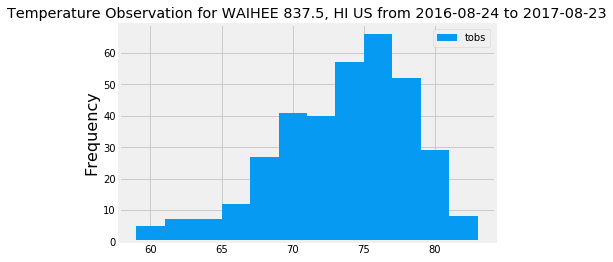

In [45]:
temperatures = [temp[0] for temp in most_active_station_tobs]                # extracts temperatures from query

plt.hist(temperatures, bins=12, color='xkcd:azure')                          # plots the data
plt.title("Temperature Observation for %s from 2016-08-24 to 2017-08-23" % (most_active_name))
plt.ylabel('Frequency', fontsize=16)
labels = ['tobs']
plt.legend(labels)
plt.savefig('histo-temp.png', dpi=300)
plt.show()



In [33]:
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [34]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
#print(calc_temps('2017-02-28', '2017-03-05'))

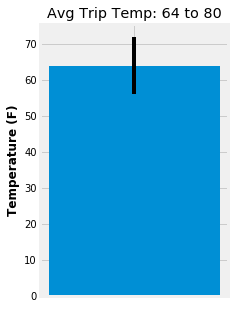

In [35]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
import matplotlib.pyplot as plt

plt.figure(figsize=(3,5))                                                    # plots data
plt.bar(1, 64, yerr=72 - 64, tick_label='')
plt.ylabel("Temperature (F)", weight="bold")
plt.title("Avg Trip Temp: %s to %s" % (64, 80))
plt.savefig('bar-chart-temp.png', dpi=300)
plt.show()


In [36]:
# Calculate the rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [37]:
def calc_prcp(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        precipitation amount and list the station, name, latitude, longitude, and elevatio

"""
    return session.query(Measurement.station, Station.name,Station.latitude,Station.longitude,Station.elevation,func.sum(Measurement.prcp)).\
        filter(Measurement.station == Station.station).filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).\
        group_by(Measurement.station).order_by(func.count(Measurement.prcp).desc()).all()
    
print(calc_prcp('2017-07-01', '2017-07-11'))


[('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6, 0.41000000000000003), ('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4, 1.36), ('USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9, 0.79), ('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0, 0.12), ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5, 0.02), ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0, 0.06), ('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9, None)]


## Optional Challenge Assignment

In [38]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)
from datetime import timedelta, date


def daily_normals(start_date, end_date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
     group_by(Measurement.station).order_by(func.count(Measurement.prcp).desc()).all()
    """
   
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).\
           filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).\
           group_by(Measurement.date).order_by(func.count(Measurement.prcp).desc()).all()
    
normals=list(daily_normals('2017-07-01', '2017-07-11'))
normals_df=pd.DataFrame(normals,columns=['min','max','average'])
print(normals_df.head(11))
#print(len(normals))

     min        max  average
0   71.0  77.166667     81.0
1   76.0  79.333333     82.0
2   69.0  77.857143     82.0
3   72.0  77.000000     81.0
4   76.0  79.571429     87.0
5   74.0  77.166667     81.0
6   74.0  77.142857     79.0
7   74.0  77.250000     80.0
8   77.0  79.200000     81.0
9   77.0  78.000000     80.0
10  75.0  78.571429     81.0


In [39]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip
#trip_start_dt = date(2017, 7, 1)
#trip_end_dt = date(2017, 7, 11)

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [40]:
from datetime import timedelta, date

def daterange(date1, date2):
    for n in range(int ((date2 - date1).days)+1):
        yield date1 + timedelta(n)

trip_start_dt = date(2017, 7, 1)
trip_end_dt = date(2017, 7, 11)
for dt in daterange(trip_start_dt, trip_end_dt):
    print(dt.strftime("%Y-%m-%d"))
no_year=[]
for dt in daterange(trip_start_dt, trip_end_dt):
    var=dt.strftime("%m-%d")
    no_year.append(var)  
date_df=pd.DataFrame(daterange(trip_start_dt, trip_end_dt),columns=['trip_dates'])

#merge the two dataframes (this was tricky thanks for stackoverflow)
ddf = pd.concat([date_df.reset_index(drop=True),normals_df.reset_index(drop=True)], axis=1)

2017-07-01
2017-07-02
2017-07-03
2017-07-04
2017-07-05
2017-07-06
2017-07-07
2017-07-08
2017-07-09
2017-07-10
2017-07-11


In [41]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


ddf.set_index('trip_dates')

,min,max,average
trip_dates,,,
2017-07-01,71.0,77.166667,81.0
2017-07-02,76.0,79.333333,82.0
2017-07-03,69.0,77.857143,82.0
2017-07-04,72.0,77.000000,81.0
2017-07-05,76.0,79.571429,87.0
2017-07-06,74.0,77.166667,81.0
2017-07-07,74.0,77.142857,79.0
2017-07-08,74.0,77.250000,80.0
2017-07-09,77.0,79.200000,81.0


In [42]:
# Plot the daily normals as an area plot with `stacked=False`


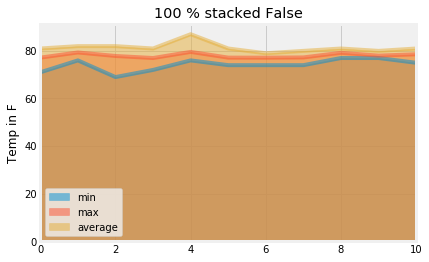

In [43]:

import matplotlib.pyplot as plt


ax = ddf.plot(kind='area', stacked=False, title='100 % stacked False')

ax.set_ylabel('Temp in F')

ax.margins(0, 0) # Set margins to avoid "whitespace"

plt.show()

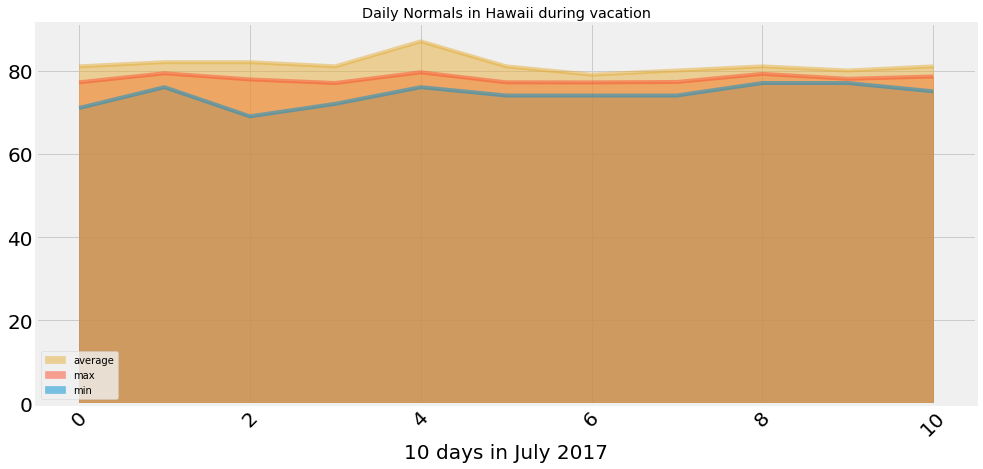

In [44]:
ddf.plot(figsize=(15, 7),                                       # plots the data
                      kind='area',
                      sort_columns=True, 
                      rot=45, 
                      use_index=True, 
                      title='Daily Normals in Hawaii during vacation', 
                      stacked=False,
                      legend='reverse',
                      fontsize=20,
                      grid=True,
                     ) 

plt.xlabel('10 days in July 2017', fontsize=20)
plt.savefig('temp-area.png', dpi=300)
plt.show()